In [1]:
%pip install pandas numpy matplotlib seaborn
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np # operaciones matematicas
import pandas as pd # manipular datos
import matplotlib.pyplot as plt # graficas
import seaborn as sns # graficas
sns.set_theme(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\adtda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#### Funciones auxiliares ######
def porcentaje_nulos(dataframe):
    # Calcula el porcentaje de valores nulos en cada columna
    porcentaje_nas = (dataframe.isnull().mean() * 100).round(2)

    # Convierte la información a un diccionario
    dict_nulos = porcentaje_nas.to_dict()

    return dict_nulos

def eliminar_columnas_con_nulos(df, umbral=0.15):

    # Calcula el porcentaje de valores nulos por columna
    porcentaje_nulos = df.isnull().mean()

    # Filtra las columnas que tienen menos del umbral de valores nulos
    columnas_a_mantener = porcentaje_nulos[porcentaje_nulos <= (1 - umbral)].index

    # Crea un nuevo DataFrame con las columnas seleccionadas
    df_resultante = df[columnas_a_mantener].copy()

    return df_resultante

# EDA

## 1. Leer los datos 

In [3]:
customer_df = pd.read_csv('archive/customer.csv')
customer_df.shape

(10695, 10)

## Paso 2: Información básica del dataset

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 835.7+ KB


In [5]:
customer_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


## Paso 3: Estadística descriptiva del dataset

In [6]:
customer_df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [7]:
customer_df.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,10695,10505,10593,10533,10695,10587
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,5841,6163,6570,3318,6494,6910


## Paso 4: Matriz de correlación entre variables

In [8]:
customer_df.corr(numeric_only=True)

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.009562,-0.029351,0.014095
Age,-0.009562,1.000000,-0.189653,-0.281725
Work_Experience,-0.029351,-0.189653,1.000000,-0.065163
Family_Size,0.014095,-0.281725,-0.065163,1.000000


In [9]:
%pip install jinja2
customer_df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\adtda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.009562,-0.029351,0.014095
Age,-0.009562,1.000000,-0.189653,-0.281725
Work_Experience,-0.029351,-0.189653,1.000000,-0.065163
Family_Size,0.014095,-0.281725,-0.065163,1.000000


## Paso 5: Inspección de características

In [10]:
porcentaje_nulos(customer_df)

{'ID': 0.0,
 'Gender': 0.0,
 'Ever_Married': 1.78,
 'Age': 0.0,
 'Graduated': 0.95,
 'Profession': 1.51,
 'Work_Experience': 10.27,
 'Spending_Score': 0.0,
 'Family_Size': 4.19,
 'Var_1': 1.01}

In [11]:
customer_df.loc[customer_df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2659,462454,Male,No,19,No,Healthcare,1.0,Low,3.0,Cat_2
2666,467442,Male,Yes,56,Yes,Artist,NaN,Average,2.0,Cat_6
2712,461671,Male,No,32,No,Healthcare,7.0,Low,5.0,Cat_6
2758,466746,Female,Yes,69,Yes,Lawyer,0.0,High,2.0,Cat_6
2820,467539,Male,Yes,48,Yes,Artist,NaN,Average,4.0,Cat_7
...,...,...,...,...,...,...,...,...,...,...
10492,467569,Male,No,19,No,Healthcare,NaN,Low,4.0,Cat_6
10514,463075,Male,Yes,52,Yes,Artist,0.0,Low,4.0,Cat_6
10645,460935,Male,Yes,87,Yes,Lawyer,0.0,Low,1.0,Cat_6
10650,464274,Female,Yes,56,Yes,Artist,1.0,Average,5.0,Cat_6


In [12]:
customer_df.drop_duplicates(inplace=True)

In [13]:
customer_df.loc[customer_df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1


In [14]:
customer_df.shape

(10559, 10)

# Preprocesamiento de datos y limpieza

In [15]:
porcentaje_nulos(customer_df)

{'ID': 0.0,
 'Gender': 0.0,
 'Ever_Married': 1.75,
 'Age': 0.0,
 'Graduated': 0.94,
 'Profession': 1.52,
 'Work_Experience': 10.11,
 'Spending_Score': 0.0,
 'Family_Size': 4.19,
 'Var_1': 0.99}

In [16]:
customer_df = customer_df.replace('Select', np.nan)

In [17]:
porcentaje_nulos(customer_df)

{'ID': 0.0,
 'Gender': 0.0,
 'Ever_Married': 1.75,
 'Age': 0.0,
 'Graduated': 0.94,
 'Profession': 1.52,
 'Work_Experience': 10.11,
 'Spending_Score': 0.0,
 'Family_Size': 4.19,
 'Var_1': 0.99}

In [18]:
customer_df['Work_Experience'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Work_Experience
1.0     0.325572
0.0     0.320936
8.0     0.063955
9.0     0.063850
2.0     0.039300
4.0     0.036140
3.0     0.034875
5.0     0.028132
6.0     0.027816
7.0     0.026762
14.0    0.006849
11.0    0.006743
10.0    0.006743
12.0    0.006322
13.0    0.006006
Name: proportion, dtype: float64

In [19]:
customer_df['Ever_Married'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Ever_Married
Yes    0.587527
No     0.412473
Name: proportion, dtype: float64

In [20]:
customer_df['Graduated'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Graduated
Yes    0.62065
No     0.37935
Name: proportion, dtype: float64

In [21]:
customer_df['Profession'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Profession
Artist           0.315223
Healthcare       0.165977
Entertainment    0.118665
Engineer         0.088951
Doctor           0.088470
Lawyer           0.080008
Executive        0.074046
Marketing        0.037696
Homemaker        0.030965
Name: proportion, dtype: float64

In [22]:
customer_df['Family_Size'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Family_Size
2.0    0.308590
1.0    0.191460
3.0    0.190175
4.0    0.178017
5.0    0.078976
6.0    0.028467
7.0    0.011960
8.0    0.006425
9.0    0.005931
Name: proportion, dtype: float64

In [23]:
customer_df['Graduated'].value_counts(normalize=True)

Graduated
Yes    0.62065
No     0.37935
Name: proportion, dtype: float64

In [24]:
customer_df['Var_1'].value_counts(normalize=True)

Var_1
Cat_6    0.653530
Cat_4    0.138894
Cat_3    0.102544
Cat_2    0.053281
Cat_7    0.025062
Cat_1    0.015783
Cat_5    0.010905
Name: proportion, dtype: float64

In [25]:
# Rellenar los valores nulos en la columna 'Ever_Married' con la moda
customer_df['Ever_Married'].fillna(customer_df['Ever_Married'].mode()[0], inplace=True)
# Rellenar los valores nulos en la columna 'Var_1' con la moda
customer_df['Var_1'].fillna(customer_df['Var_1'].mode()[0], inplace=True)
# Rellenar los valores nulos en la columna 'Work_Experience' con la mediana
customer_df['Work_Experience'].fillna(customer_df['Work_Experience'].median(), inplace=True)
# Rellenar los valores nulos en la columna 'Profession' con la moda
customer_df['Profession'].fillna(customer_df['Profession'].mode()[0], inplace=True)
# Rellenar los valores nulos en la columna 'Graduated' con la moda
customer_df['Graduated'].fillna(customer_df['Graduated'].mode()[0], inplace=True)
# Rellenar los valores nulos en la columna 'Family_Size' con la mediana
customer_df['Family_Size'].fillna(customer_df['Family_Size'].median(), inplace=True)

In [26]:
customer_df = customer_df.replace('Select', np.nan)

In [27]:
porcentaje_nulos(customer_df)

{'ID': 0.0,
 'Gender': 0.0,
 'Ever_Married': 0.0,
 'Age': 0.0,
 'Graduated': 0.0,
 'Profession': 0.0,
 'Work_Experience': 0.0,
 'Spending_Score': 0.0,
 'Family_Size': 0.0,
 'Var_1': 0.0}

In [28]:
customer_df.duplicated().sum()

0

In [29]:
customer_df.nunique()

ID                 8363
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

Visualizando distribuciones numéricas...


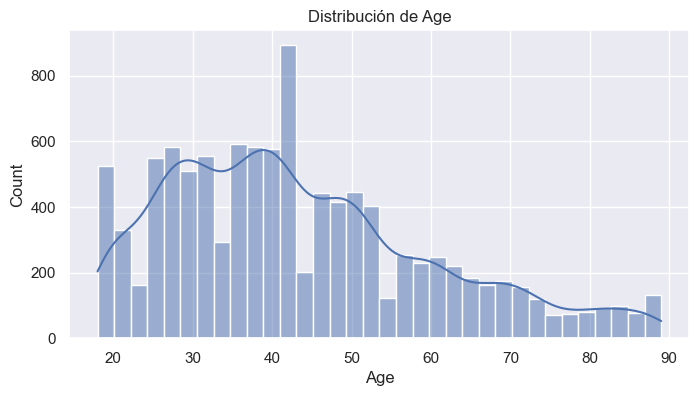

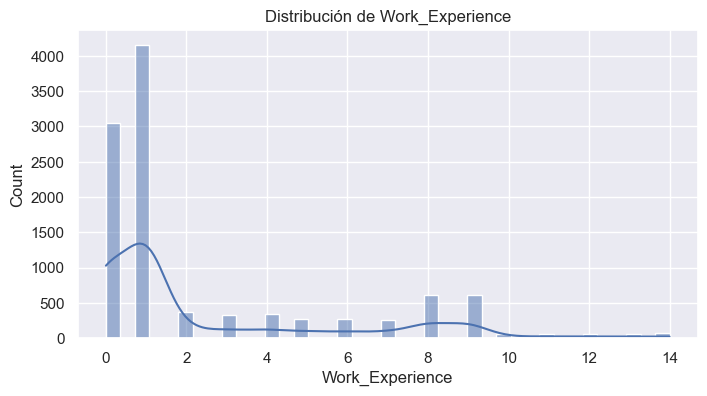

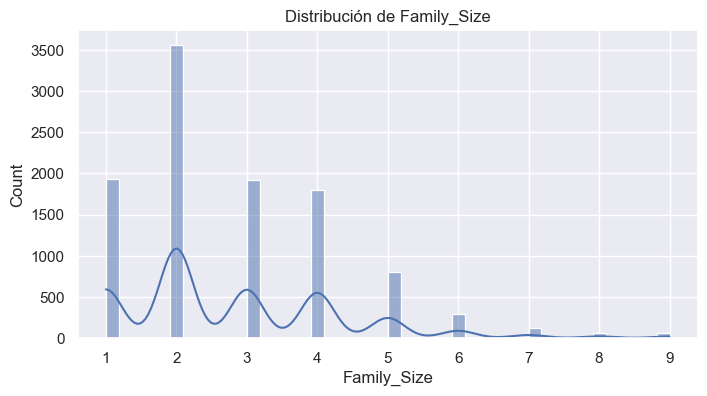

In [30]:
customer_df = customer_df.drop(columns=['ID'], axis=1)
numeric_cols = customer_df.select_dtypes(include=np.number).columns.tolist()
print("Visualizando distribuciones numéricas...")
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(customer_df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()


In [31]:
categorical_cols = customer_df.select_dtypes(include='object').columns.tolist()
# Asegúrate de que Var_1 se trate como categórica si lo es
if 'Var_1' in customer_df.columns and customer_df['Var_1'].dtype != 'object':
     customer_df['Var_1'] = customer_df['Var_1'].astype('category') # O 'object'
     if 'Var_1' not in categorical_cols:
          categorical_cols.append('Var_1')


Visualizando distribuciones categóricas...


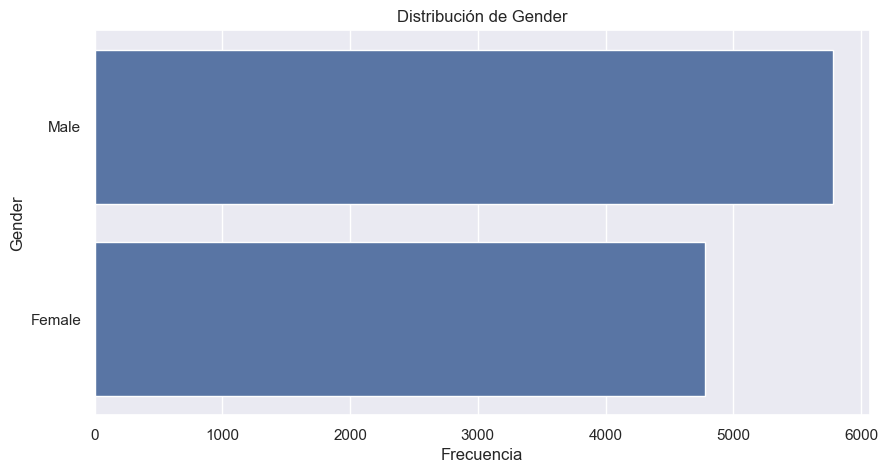

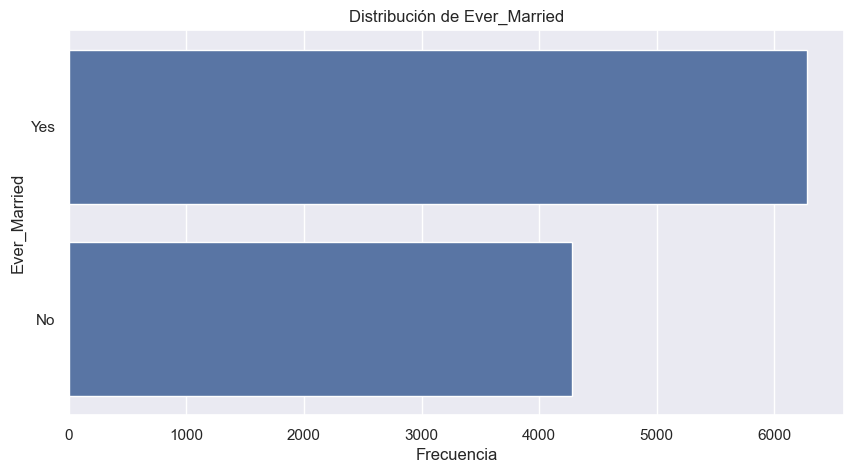

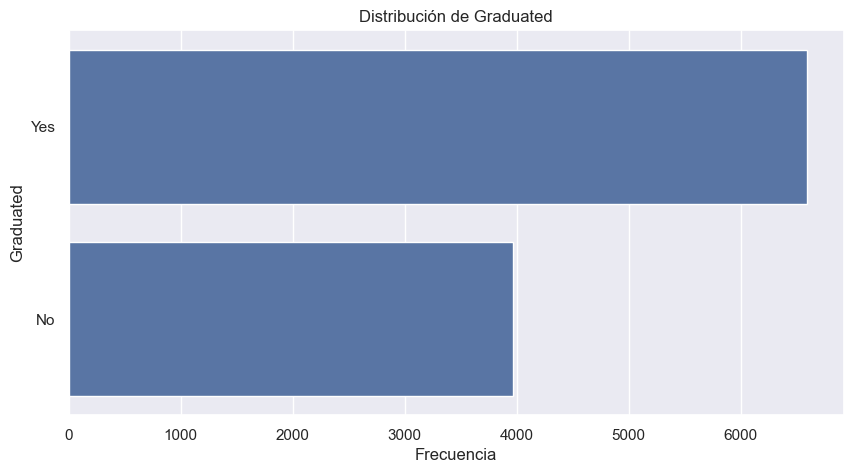

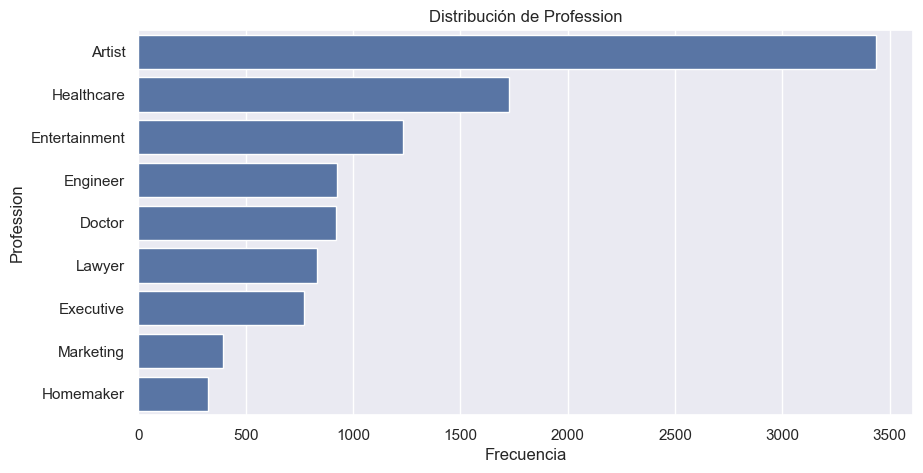

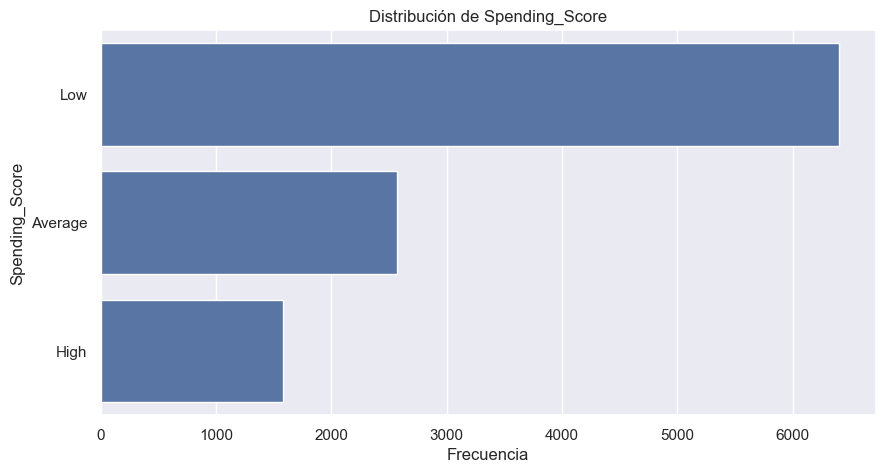

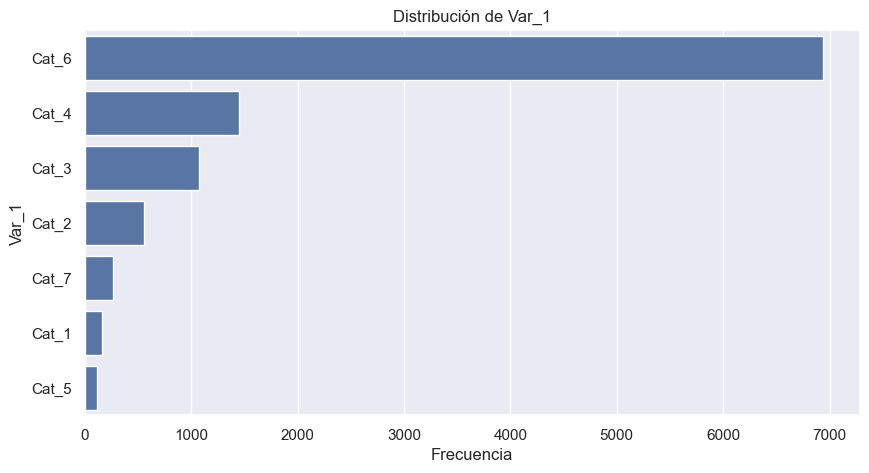

In [32]:
print("\nVisualizando distribuciones categóricas...")
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    # Ordenar por frecuencia puede ser útil
    order = customer_df[col].value_counts().index 
    sns.countplot(data=customer_df, y=col, order=order) # Usar 'y' para mejor legibilidad con muchas categorías
    plt.title(f'Distribución de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

In [33]:
customer_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6


In [34]:
customer_df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [35]:
varlist =  ['Gender']

def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [36]:
varlist =  ['Ever_Married', 'Graduated']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [37]:
varlist =  ['Spending_Score']

def binary_map(x):
    return x.map({'Low': 0, "Average": 1, "High": 2})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [38]:
varlist =  ['Var_1']

def binary_map(x):
    return x.map({'Cat_1': 0, "Cat_2": 1, "Cat_3": 2, "Cat_4": 3, "Cat_5": 4, "Cat_6": 5, "Cat_7": 6})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [39]:
customer_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,Engineer,0.0,0,1.0,5
1,1,1,37,1,Healthcare,8.0,1,4.0,5
2,0,1,69,0,Artist,0.0,0,1.0,5
3,1,1,59,0,Executive,11.0,2,2.0,5
4,0,0,19,0,Marketing,1.0,0,4.0,5


In [40]:
customer_df['Profession'].value_counts(normalize=True)

Profession
Artist           0.325599
Healthcare       0.163462
Entertainment    0.116867
Engineer         0.087603
Doctor           0.087129
Lawyer           0.078795
Executive        0.072924
Marketing        0.037125
Homemaker        0.030495
Name: proportion, dtype: float64

In [41]:
varlist =  ['Profession']

def binary_map(x):
    return x.map({'Artist': 0, "Healthcare": 1, "Entertainment": 2, "Engineer": 3, "Doctor": 4, "Lawyer": 5, "Executive": 6, "Marketing": 7, "Homemaker": 8})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [42]:
customer_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,3,0.0,0,1.0,5
1,1,1,37,1,1,8.0,1,4.0,5
2,0,1,69,0,0,0.0,0,1.0,5
3,1,1,59,0,6,11.0,2,2.0,5
4,0,0,19,0,7,1.0,0,4.0,5


In [43]:
customer_df.shape

(10559, 9)

In [44]:
from sklearn.model_selection import train_test_split

customer_df = customer_df.dropna()
x = customer_df

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[['Gender','Ever_Married','Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1' ]] = scaler.fit_transform(x[['Gender','Ever_Married','Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']])
x.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,1.0,0.253521,1.0,0.375,0.000000,0.0,0.000,0.833333
1,1.0,1.0,0.267606,1.0,0.125,0.571429,0.5,0.375,0.833333
2,0.0,1.0,0.718310,0.0,0.000,0.000000,0.0,0.000,0.833333
3,1.0,1.0,0.577465,0.0,0.750,0.785714,1.0,0.125,0.833333
4,0.0,0.0,0.014085,0.0,0.875,0.071429,0.0,0.375,0.833333


## Reducción de dimensionalidad.

In [46]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.discriminant_analysis import StandardScaler


# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(customer_df)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los componentes principales
df_pca_df = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

# Visualizar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Mostrar la varianza explicada
explained_variance

array([0.2534532 , 0.15762788])

## Standar Scaler

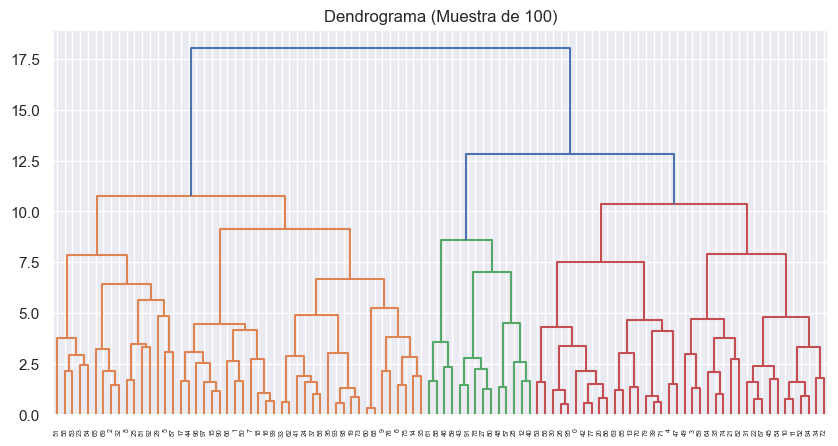

In [47]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

numerical_columns = [
   "Gender","Ever_Married","Age","Graduated","Profession","Work_Experience", "Spending_Score","Family_Size","Var_1"
]

scaler = StandardScaler()

# Muestrear una parte de los datos para evitar problemas de memoria
sample_size = 100  # Reducimos la cantidad de puntos analizados
df_sample = customer_df.sample(n=sample_size, random_state=42)

# Estandarizar los datos del subconjunto
df_sample_scaled = scaler.fit_transform(df_sample[numerical_columns])

# Crear el dendrograma para la estimación de clusters
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_sample_scaled, method='ward'))
plt.title("Dendrograma (Muestra de 100)")
plt.show()

## K-Means

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Aplicar K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
x["Cluster"] = kmeans.fit_predict(X_scaled)

# Obtener el tamaño de cada cluster
cluster_sizes = x["Cluster"].value_counts()

# Mostrar la distribución de los clusters
cluster_sizes.to_frame()

,count
Cluster,
0,3086
3,2212
4,2081
2,1601
1,1579


In [49]:
cluster_means = x.groupby("Cluster").mean()
cluster_means

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Cluster,,,,,,,,,
0,0.572910,1.000000,0.433785,0.890149,0.101223,0.082747,0.393552,0.212370,0.703392
1,0.429386,0.520583,0.273136,0.722609,0.302011,0.628834,0.165611,0.157536,0.719020
2,0.432230,0.000625,0.291059,0.921924,0.207995,0.084590,0.000000,0.127655,0.725484
3,0.564195,0.136980,0.125213,0.078210,0.283002,0.120479,0.028481,0.382346,0.579792
4,0.668909,0.993753,0.616483,0.506487,0.646504,0.099128,0.640557,0.208914,0.742432


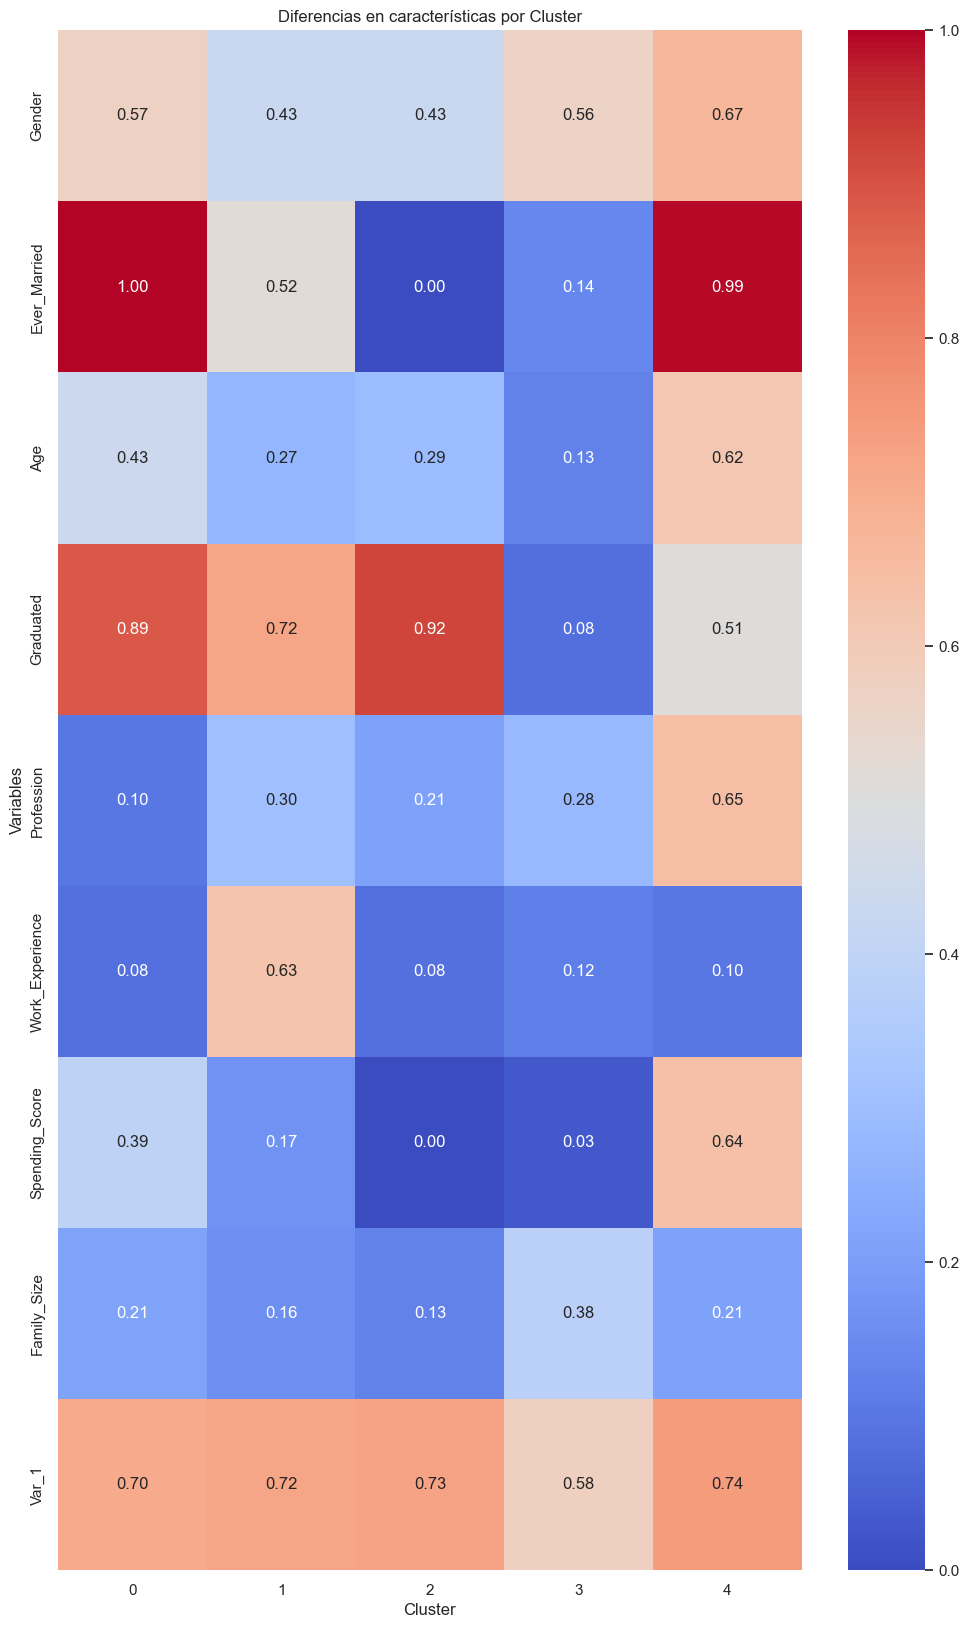

In [50]:
plt.figure(figsize=(12, 20))
sns.heatmap(cluster_means.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Diferencias en características por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()

## DBSCAN

In [51]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(x)

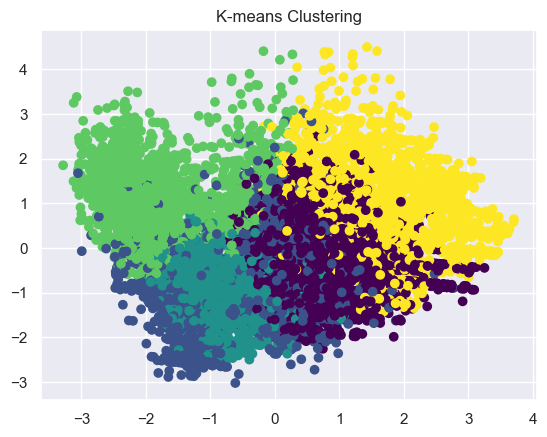

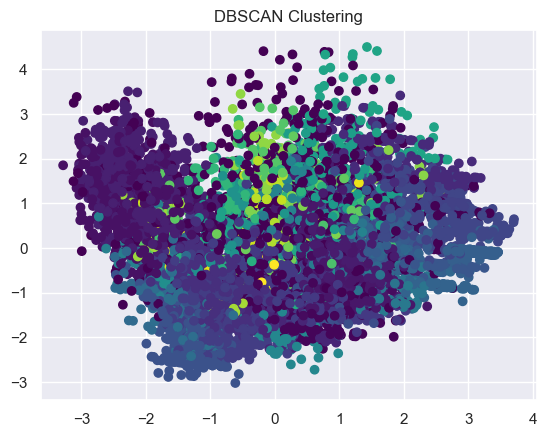

In [52]:
# Función para visualizar clusters
def plot_clusters(X, labels, title):
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

# Visualizar resultados
plot_clusters(x, x["Cluster"] , 'K-means Clustering')
plot_clusters(x, dbscan_labels, 'DBSCAN Clustering')

In [53]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(x, x['Cluster'])
dbscan_silhouette = silhouette_score(x, dbscan_labels)
print(f'K-means Silhouette Score: {kmeans_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'K-means Inertia: {kmeans.inertia_}')


K-means Silhouette Score: 0.3718560947710195
DBSCAN Silhouette Score: 0.31278568920225874
K-means Inertia: 58504.82073010422


# Conclusiones

Basándonos en la segmentación realizada mediante el algoritmo **K-means** y analizando la matriz de calor que muestra las medias normalizadas por cluster, podemos extraer varias conclusiones valiosas sobre los distintos perfiles de clientes.

#### Interpretación de los Clusters

La matriz de calor permite observar qué variables destacan en cada grupo. Algunos puntos clave:

- **Cluster 0**:  
  - Altos niveles de personas casadas (`Ever_Married = 1.0`) y graduadas (`Graduated ≈ 0.89`).
  - Promedio en edad, pero bajo en experiencia laboral y profesión.
  - Nivel medio de gasto (`Spending_Score ≈ 0.39`).
  - Parece representar adultos jóvenes responsables, con alto nivel educativo pero aún con poca experiencia laboral.

- **Cluster 1**:  
  - Nivel medio-alto en experiencia laboral (`≈ 0.63`) y graduación (`≈ 0.72`).
  - Menor nivel de gasto (`Spending_Score ≈ 0.17`).
  - Posiblemente personas trabajadoras y estables, pero conservadoras en sus gastos.

- **Cluster 2**:  
  - Altísima proporción de graduados (`Graduated ≈ 0.92`), pero **cero** personas casadas (`Ever_Married = 0.0`).
  - También el gasto es **mínimo** (`Spending_Score = 0.0`).
  - Perfil de personas jóvenes, educadas, solteras y ahorrativas. Buen target para campañas de fidelización temprana.

- **Cluster 3**:  
  - Los valores son bajos en la mayoría de variables, incluyendo graduación, edad y gasto.
  - Podría tratarse de un grupo marginal o de bajo compromiso económico, posiblemente estudiantes o personas con bajo poder adquisitivo.

- **Cluster 4**:  
  - Altos valores en género (`Gender ≈ 0.67`), estado civil (`Ever_Married ≈ 0.99`), y gasto (`Spending_Score ≈ 0.64`).
  - Nivel medio en educación y profesión.
  - Este grupo representa probablemente adultos establecidos, con buenos ingresos y predisposición al consumo. Ideal para promociones premium o experiencias personalizadas.

#### Aplicaciones Prácticas

Esta segmentación permite diseñar estrategias diferenciadas como:

- **Marketing dirigido**: Crear campañas específicas para los segmentos jóvenes, de alto gasto o con alta formación.
- **Promociones personalizadas**: Enviar ofertas distintas a Cluster 2 (bajo gasto pero alto nivel educativo) y Cluster 4 (alto gasto y estabilidad).
- **Diseño de productos o servicios**: Adaptar horarios, canales de comunicación o tipo de contenido según el perfil de cada cluster.

